In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
file_path = r"C:\Users\Asus\Desktop\Python\clustering\bank-full.csv"
data = pd.read_csv(file_path, delimiter=';')

last_data = r"C:\Users\Asus\Desktop\Python\clustering\bank-full-copy.csv"
data.to_csv(last_data, index=False)

In [9]:
pd.set_option('display.max_columns', None)

In [10]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [11]:
data.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [14]:
data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [15]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [16]:
data.duplicated().sum()

np.int64(0)

In [17]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [18]:
#Distribution for some numerical columns

sns.set(style='whitegrid')
print(data[['age', 'balance', 'duration']].describe())

                age        balance      duration
count  45211.000000   45211.000000  45211.000000
mean      40.936210    1362.272058    258.163080
std       10.618762    3044.765829    257.527812
min       18.000000   -8019.000000      0.000000
25%       33.000000      72.000000    103.000000
50%       39.000000     448.000000    180.000000
75%       48.000000    1428.000000    319.000000
max       95.000000  102127.000000   4918.000000


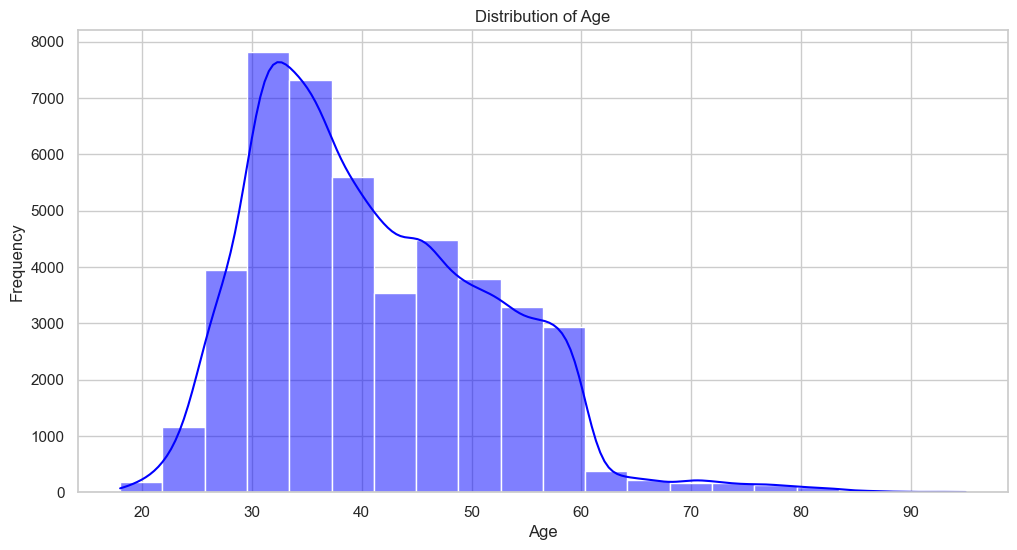

In [19]:
#Histogram for Age

plt.figure(figsize=(12,6))
sns.histplot(data['age'], bins=20, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

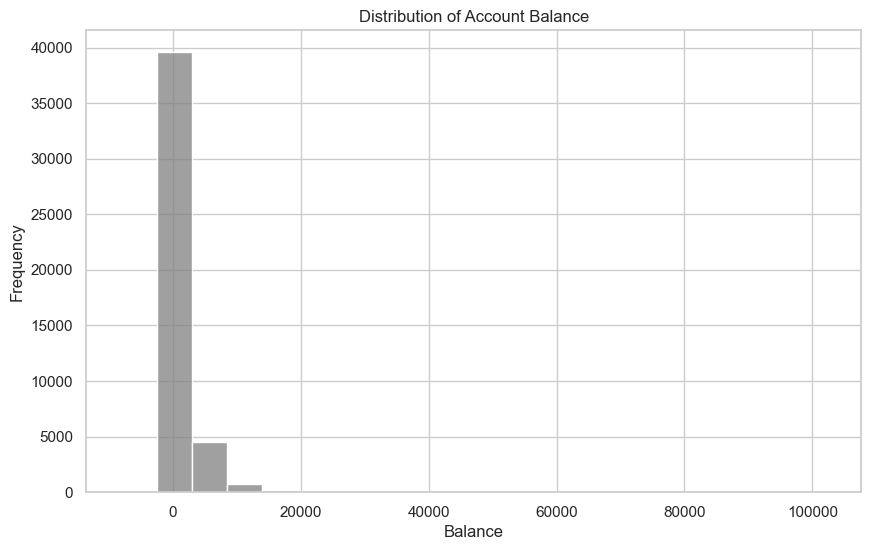

In [20]:
#Histogram for Balance

plt.figure(figsize=(10, 6))
sns.histplot(data['balance'], bins=20, kde=False, color='grey')
plt.title('Distribution of Account Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

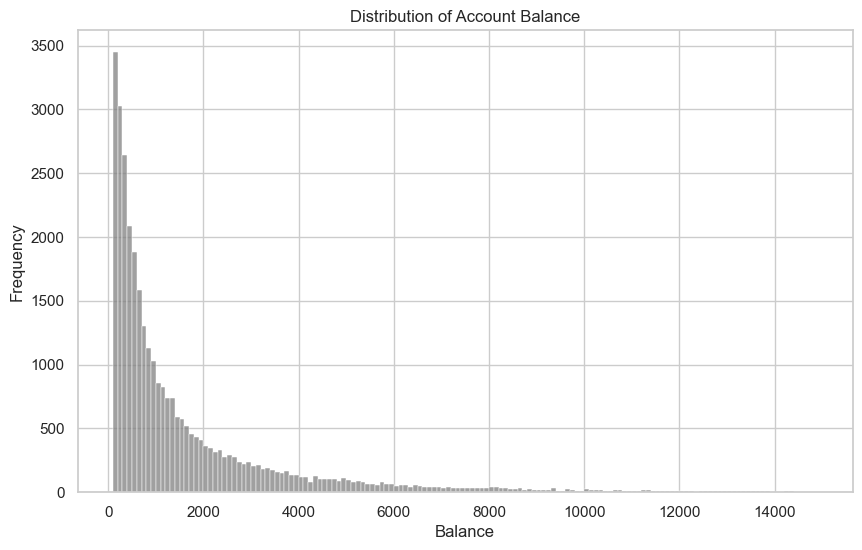

In [21]:
bin_edges = range(100, 15000, 100)

plt.figure(figsize=(10, 6))
sns.histplot(data['balance'], bins=bin_edges, kde=False, color='grey')
plt.title('Distribution of Account Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_12140\183142948.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data['job'], order=data['job'].value_counts().index, palette='viridis')


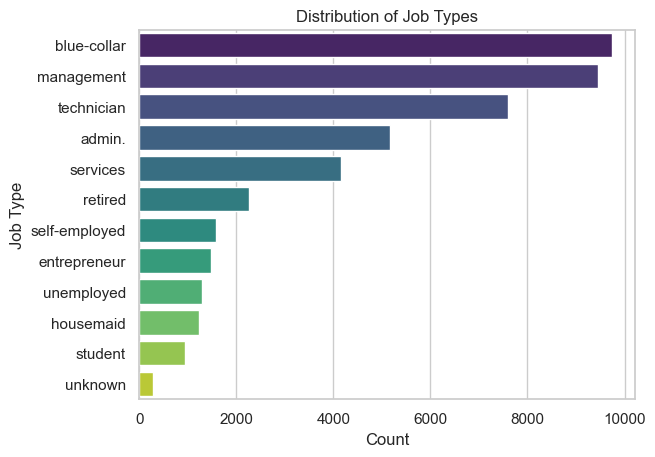

In [22]:
#Bar plot for 'Job' column

sns.countplot(y=data['job'], order=data['job'].value_counts().index, palette='viridis')
plt.title('Distribution of Job Types')
plt.xlabel('Count')
plt.ylabel('Job Type')
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_12140\428007697.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data['marital'], palette='viridis')


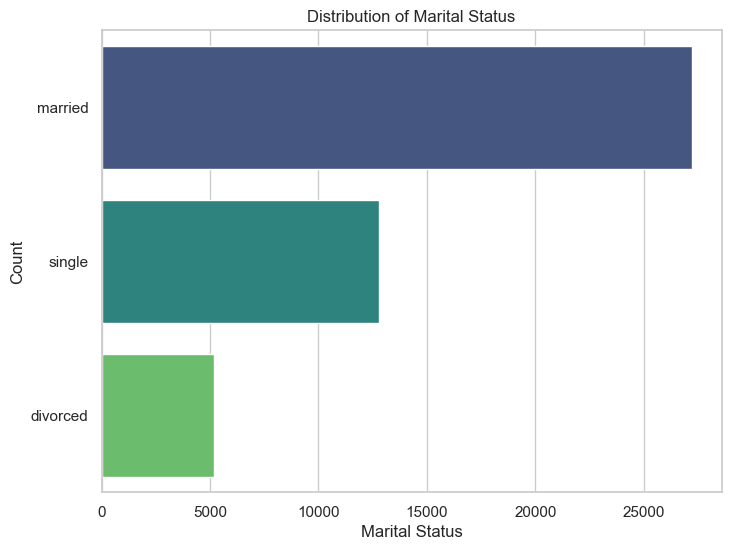

In [23]:
#Bar plot fot 'Martial Status' column

plt.figure(figsize=(8, 6))
sns.countplot(y=data['marital'], palette='viridis')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

In [24]:
numeric_columns = data.select_dtypes(include='number')

column_with_outliers = []

for col in numeric_columns:

  if col != 'mental_health_score':

      Q1 = numeric_columns[col].quantile(0.25)
      Q3 = numeric_columns[col].quantile(0.75)
      IQR = Q3 - Q1
      lower = Q1 - 1.5 * IQR
      upper=  Q3 + 1.5 * IQR

      if ((numeric_columns[col] < lower) | (numeric_columns[col] > upper)).any:
          column_with_outliers.append(col)

for col in column_with_outliers:
  print(col)

age
balance
day
duration
campaign
pdays
previous


In [25]:
data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [26]:
skew1 = data[numeric_columns.columns].skew()
skew1

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

In [27]:
for col in column_with_outliers:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    data[col] = np.clip(data[col], lower, upper)

In [28]:
import numpy as np
import pandas as pd
from scipy import stats

threshold = 3


for col in column_with_outliers:
    if data[col].dtype in ['float64', 'int64']:
        z_scores_after = stats.zscore(data[col].dropna())

        outliers_after = np.abs(z_scores_after) > threshold
        print(f"Outliers in {col} after handling: {np.sum(outliers_after)}")



Outliers in age after handling: 0
Outliers in balance after handling: 0
Outliers in day after handling: 0
Outliers in duration after handling: 0
Outliers in campaign after handling: 0
Outliers in pdays after handling: 0
Outliers in previous after handling: 0


C:\Users\Asus\AppData\Local\Temp\ipykernel_12140\1665238770.py:10: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores_after = stats.zscore(data[col].dropna())


In [29]:
data.nunique()

age            54
job            12
marital         3
education       4
default         2
balance      4163
housing         2
loan            2
contact         3
day            31
month          12
duration      644
campaign        6
pdays           1
previous        1
poutcome        4
y               2
dtype: int64

In [30]:
numerical_columns = data.select_dtypes(include='number')

for col in data[numeric_columns.columns]:
  if data[col].nunique() == 1:
    data.drop(columns=[col], inplace=True)

In [31]:
data.nunique()

age            54
job            12
marital         3
education       4
default         2
balance      4163
housing         2
loan            2
contact         3
day            31
month          12
duration      644
campaign        6
poutcome        4
y               2
dtype: int64

In [32]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,unknown,no
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,unknown,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,unknown,no
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,unknown,no
4,33.0,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,unknown,no
5,35.0,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,unknown,no
6,28.0,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,unknown,no
7,42.0,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,unknown,no
8,58.0,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,unknown,no
9,43.0,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,unknown,no


In [33]:
new_numerical_columns = data.select_dtypes(include='number')

skew = new_numerical_columns.skew()
print(skew)

age         0.529715
balance     1.097802
day         0.093079
duration    1.037574
campaign    1.099115
dtype: float64


In [34]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
poutcome     0
y            0
dtype: int64

<Axes: >

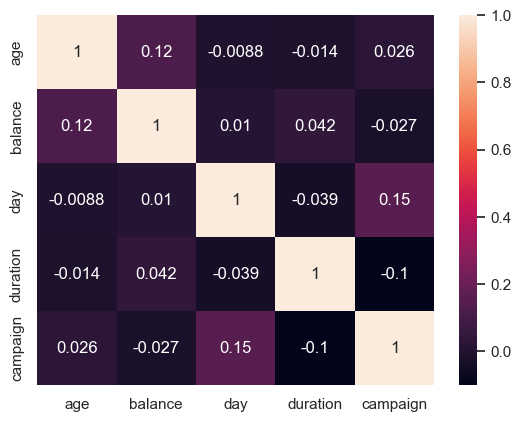

In [35]:
sns.heatmap(new_numerical_columns.corr(), annot=True)

In [36]:
data.dtypes

age          float64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
poutcome      object
y             object
dtype: object

In [37]:
from sklearn.preprocessing import StandardScaler
numeric_columns = data.select_dtypes(include='number')

scaler = StandardScaler()
data[numeric_columns.columns] = scaler.fit_transform(data[numeric_columns.columns])

In [38]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,1.648117,management,married,tertiary,no,1.027653,yes,no,unknown,-1.298476,may,0.147445,-0.870092,unknown,no
1,0.301287,technician,single,secondary,no,-0.768817,yes,no,unknown,-1.298476,may,-0.474910,-0.870092,unknown,no
2,-0.756936,entrepreneur,married,secondary,no,-0.791761,yes,yes,unknown,-1.298476,may,-0.899243,-0.870092,unknown,no
3,0.589894,blue-collar,married,unknown,no,0.486333,yes,no,unknown,-1.298476,may,-0.808718,-0.870092,unknown,no
4,-0.756936,unknown,single,unknown,no,-0.792611,no,no,unknown,-1.298476,may,-0.208994,-0.870092,unknown,no
5,-0.564532,management,married,tertiary,no,-0.597158,yes,no,unknown,-1.298476,may,-0.542803,-0.870092,unknown,no
6,-1.237947,management,single,tertiary,no,-0.413602,yes,yes,unknown,-1.298476,may,-0.101497,-0.870092,unknown,no
7,0.108883,entrepreneur,divorced,tertiary,yes,-0.791761,yes,no,unknown,-1.298476,may,0.820721,-0.870092,unknown,no
8,1.648117,retired,married,primary,no,-0.690636,yes,no,unknown,-1.298476,may,-1.046345,-0.870092,unknown,no
9,0.205085,technician,single,secondary,no,-0.289532,yes,no,unknown,-1.298476,may,-1.018056,-0.870092,unknown,no


In [39]:
cat_columns = data.select_dtypes(include='object').columns.drop('y')

data_encoded = pd.get_dummies(data, columns=cat_columns)

data = data_encoded


In [40]:
data.head(10)

,age,balance,day,duration,campaign,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.648117,1.027653,-1.298476,0.147445,-0.870092,no,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
1,0.301287,-0.768817,-1.298476,-0.474910,-0.870092,no,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
2,-0.756936,-0.791761,-1.298476,-0.899243,-0.870092,no,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
3,0.589894,0.486333,-1.298476,-0.808718,-0.870092,no,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
4,-0.756936,-0.792611,-1.298476,-0.208994,-0.870092,no,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
5,-0.564532,-0.597158,-1.298476,-0.542803,-0.870092,no,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
6,-1.237947,-0.413602,-1.298476,-0.101497,-0.870092,no,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
7,0.108883,-0.791761,-1.298476,0.820721,-0.870092,no,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
8,1.648117,-0.690636,-1.298476,-1.046345,-0.870092,no,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
9,0.205085,-0.289532,-1.298476,-1.018056,-0.870092,no,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True


In [41]:
X = data.drop(columns=['y'])

In [ ]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score



# K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(X)

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=4)
agg_labels = agg.fit_predict(X)


def evaluate_clustering(X, labels, name):
    valid_labels = labels[labels != -1]
    valid_X = X[labels != -1]
    if len(set(valid_labels)) > 1:
        silhouette = silhouette_score(valid_X, valid_labels)
        dbi = davies_bouldin_score(valid_X, valid_labels)
        chi = calinski_harabasz_score(valid_X, valid_labels)
        print(f"\n{name} Results:")
        print(f"Silhouette Score: {silhouette:.4f}")
        print(f"Davies-Bouldin Index: {dbi:.4f}")
        print(f"Calinski-Harabasz Index: {chi:.2f}")
    else:
        print(f"\n{name} Results: Not enough clusters for evaluation")


evaluate_clustering(X, kmeans_labels, "KMeans")
evaluate_clustering(X, dbscan_labels, "DBSCAN")
evaluate_clustering(X, agg_labels, "Agglomerative")


KMeans Results:
Silhouette Score: 0.0971
Davies-Bouldin Index: 2.4797
Calinski-Harabasz Index: 4050.84

DBSCAN Results:
Silhouette Score: -0.2269
Davies-Bouldin Index: 1.3016
Calinski-Harabasz Index: 9.73

Agglomerative Results:
Silhouette Score: 0.0824
Davies-Bouldin Index: 2.5784
Calinski-Harabasz Index: 3265.87


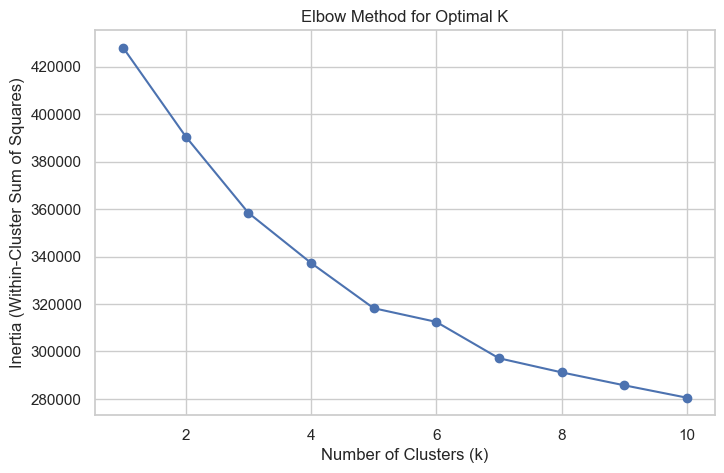

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.show()


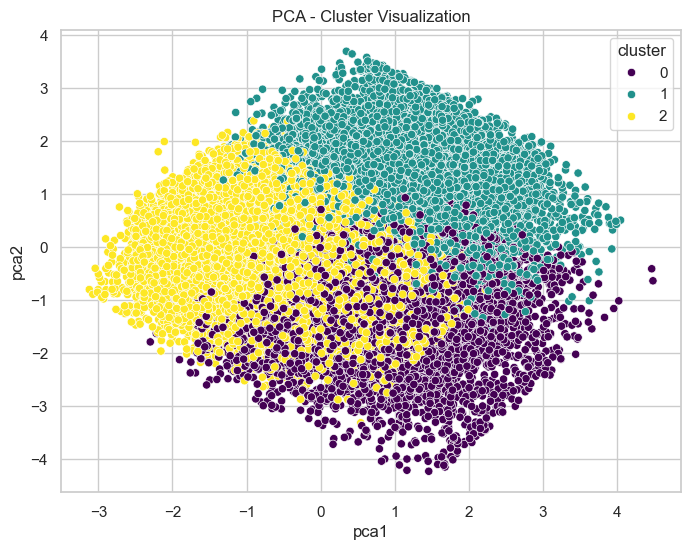

In [45]:
from sklearn.decomposition import PCA


kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

# Dimensionality Reduction - PCA
pca = PCA(n_components=2)
data[['pca1', 'pca2']] = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='pca1', y='pca2', hue='cluster', palette='viridis')
plt.title('PCA - Cluster Visualization')
plt.show()


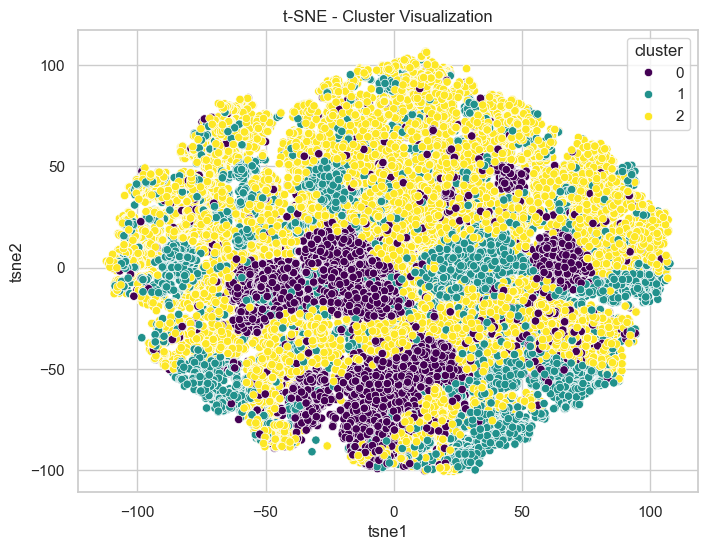

In [46]:
from sklearn.manifold import TSNE


# Dimensionality Reduction - t-SNE
tsne = TSNE(n_components=2, random_state=42)
data[['tsne1', 'tsne2']] = tsne.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='tsne1', y='tsne2', hue='cluster', palette='viridis')
plt.title('t-SNE - Cluster Visualization')
plt.show()